In [1]:
import torch
from torch import nn
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor
import numpy as np
from torch.utils.data import DataLoader
from tqdm.auto import tqdm
import matplotlib.pyplot as plt

1. Get data
2. viusalize data
3. convert to tensor
4. train - test split, batches (custom dataset)
5. loss function
6. optimizer
7. training loop

In [3]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [4]:
train_data = datasets.FashionMNIST(root="/content/drive/MyDrive", train=True, download=True, transform=ToTensor())
test_data = datasets.FashionMNIST(root="/content/drive/MyDrive", train=False, download=True, transform=ToTensor())

In [13]:
classes = train_data.classes
classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
train_data.data.shape, train_data.train_labels.shape

/usr/local/lib/python3.10/dist-packages/torchvision/datasets/mnist.py:65: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


(torch.Size([60000, 28, 28]), torch.Size([60000]))

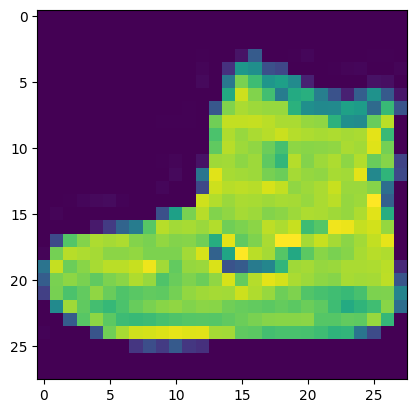

In [ ]:
image, label = train_data[0]
plt.imshow(image.squeeze())

In [ ]:
train_data.data[0]

tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,
           0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,   1,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,   0,
          36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,   0,   3],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,   0,
         102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,  10,   0],
        [  0,   0,   0,   0,   0,   0,   0,   

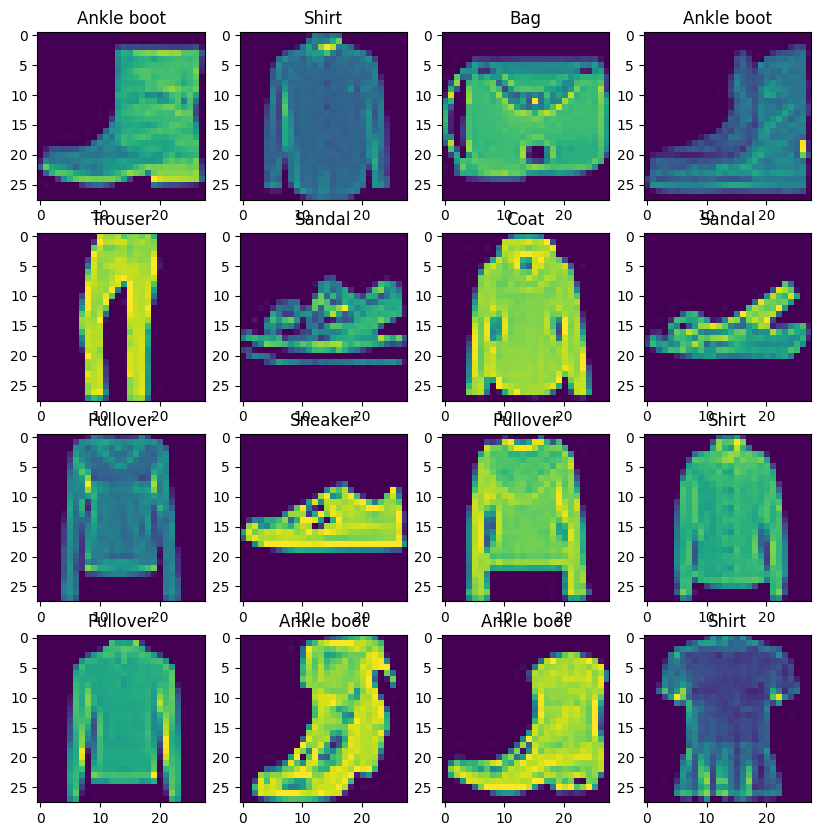

In [ ]:
torch.manual_seed(42)
random_idx = torch.randint(0, len(train_data.data), size=(16,))

plt.figure(figsize=(10,10))
for idx, i in zip(random_idx, range(16)):
    image, label = train_data[idx]
    plt.subplot(4, 4, i+1)
    plt.imshow(image.squeeze())
    plt.title(classes[label])


In [11]:
train_loader = DataLoader(train_data, shuffle=True, batch_size=16)
test_loader = DataLoader(test_data, shuffle=True, batch_size=16)

In [ ]:
next(iter(train_loader))

[tensor([[[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           ...,
           [0.0000, 0.0000, 0.0000,  ..., 0.0157, 0.0000, 0.0039],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]]],
 
 
         [[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           ...,
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]]],
 
 
         [[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000

Build the Model

In [14]:
class FashionMNIST_model(nn.Module):
  def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
    super().__init__()
    self.block1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2)
    )
    self.block2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2)
    )

    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*7*7,
                  out_features=output_shape)
    )

  def forward(self, x):
    x1 = self.block1(x)
    # print(x1.shape)
    x2 = self.block2(x1)
    # print(x2.shape)
    x3 = self.classifier(x2)
    # print(x3.shape)

    return x3

# torch.manual_seed(3407)
# torch.manual_seed(42)
model = FashionMNIST_model(input_shape=1, hidden_units=10, output_shape=len(classes)).to(device)



In [15]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model.parameters(), lr = 0.1)

In [ ]:
next(iter(train_loader))[0][15].unsqueeze(0).shape

torch.Size([1, 1, 28, 28])

In [ ]:
pred = model(next(iter(train_loader))[0][15].unsqueeze(0).to(device))
pred[0]

tensor([-0.0269, -0.0264, -0.0172, -0.0019,  0.0607,  0.0179, -0.0569,  0.0710,
        -0.0404, -0.0217], device='cuda:0', grad_fn=<SelectBackward0>)

In [16]:
def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct / len(y_pred)) * 100
  return acc

In [18]:
num_epochs = 10
# torch.manual_seed(42)
train_accuracy_values = []
test_accuracy_values = []
for epochs in tqdm(range(num_epochs)):
  train_accuracy_cum = 0
  test_accuracy_cum = 0
  for X, y in train_loader:
    model.train()
    X = X.to(device)
    y = y.to(device)
    train_logits = model(X)
    train_y_pred = torch.softmax(train_logits, dim=1).argmax(dim=1)
    train_loss = loss_fn(train_logits, y)
    train_accuracy = accuracy_fn(y, train_y_pred)
    train_accuracy_cum += train_accuracy;
    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()

  model.eval()
  train_accuracy_values.append(train_accuracy_cum/len(train_loader)) #Batch average accuracy
  with torch.inference_mode():
    for X, y in test_loader:
      X = X.to(device)
      y = y.to(device)
      test_logits = model(X)
      test_y_pred = torch.softmax(test_logits, dim=1).argmax(dim=1)
      test_accuracy = accuracy_fn(y, test_y_pred)
      test_accuracy_cum += test_accuracy

  test_accuracy_values.append(test_accuracy_cum/len(test_loader))
  # if((epochs + 1) % 10 == 0):
  #   print(f"Epoch {epochs+1}: Train Accuracy {train_accuracy_cum/len(train_loader)} | Train Accuracy {test_accuracy_cum/len(test_loader)}")

  print(f"Epoch {epochs+1}: Train Accuracy {train_accuracy_cum/len(train_loader)} | Train Accuracy {test_accuracy_cum/len(test_loader)}")




  0%|          | 0/10 [00:00<?, ?it/s]

Epoch 1: Train Accuracy 86.09666666666666 | Train Accuracy 86.56
Epoch 2: Train Accuracy 87.80166666666666 | Train Accuracy 87.26
Epoch 3: Train Accuracy 88.45166666666667 | Train Accuracy 87.5
Epoch 4: Train Accuracy 88.95333333333333 | Train Accuracy 89.17
Epoch 5: Train Accuracy 89.36666666666666 | Train Accuracy 88.83
Epoch 6: Train Accuracy 89.43666666666667 | Train Accuracy 87.93
Epoch 7: Train Accuracy 89.77666666666667 | Train Accuracy 88.68
Epoch 8: Train Accuracy 89.785 | Train Accuracy 88.6
Epoch 9: Train Accuracy 89.98333333333333 | Train Accuracy 89.51
Epoch 10: Train Accuracy 90.08166666666666 | Train Accuracy 88.88


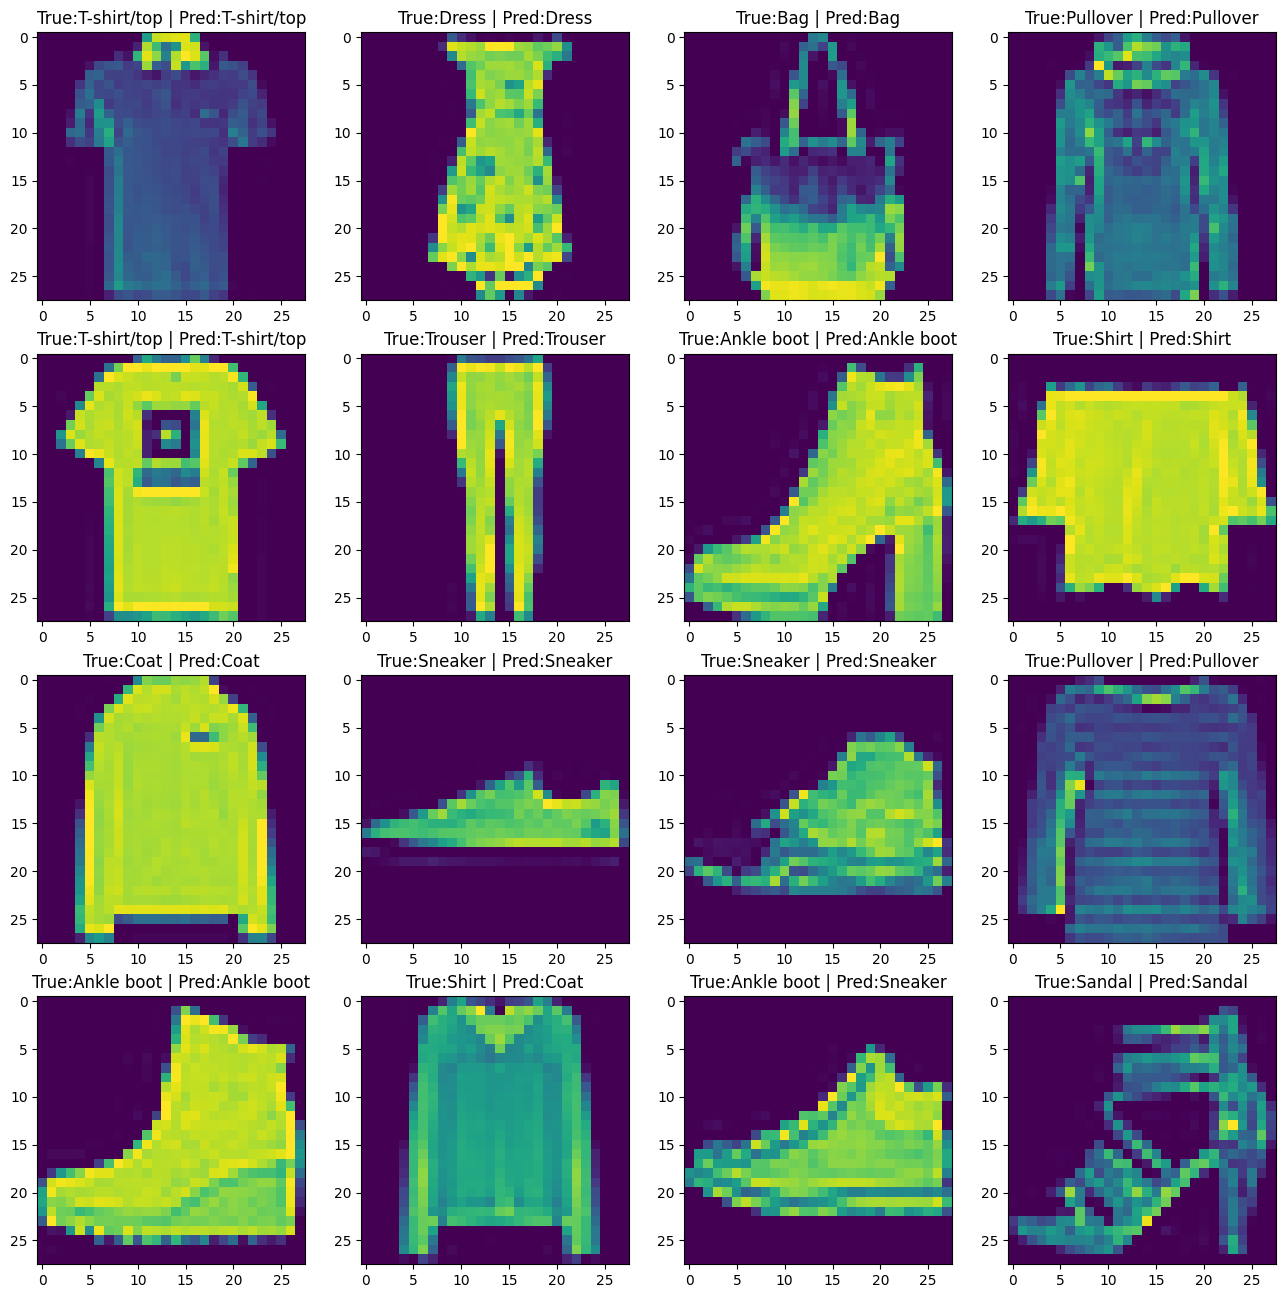

In [24]:
random_idx = torch.randint(0, len(test_data), (16,))

plt.figure(figsize=(16,16))
for idx, i in zip(random_idx, range(16)):
  img, label = test_data[idx]
  img = img.to(device)
  pred = model(img.unsqueeze(0))
  y_pred = torch.softmax(pred, 1).argmax(1)
  plt.subplot(4,4,i+1)
  plt.imshow(img.detach().cpu().numpy().squeeze())
  plt.title("True:" + classes[label] + " | Pred:" + classes[y_pred])


